In [1]:
!python -m pip list

Package                   Version
------------------------- --------------
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.2.0
executing                 2.0.1
fastjsonschema            2.19.1
filelock                  3.13.3
fonttools                 4.50.0
fqdn                      1.5.1
fsspec                    2024.3.1
gitdb                     4.0.11
GitPython   

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Objective : Create a model that could predict daily revenue in dollars based on the outside air temperature (deg C)

* Input / Independent Variables / Explanatory Variables : Outside Air Temperature
* Output / Dependent Variables / Target Variables : Revenue generated 



In [3]:
sales_df = pd.read_csv('IceCreamData.csv')
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
sales_df[['Temperature','Revenue']].agg(['mean','max'])

,Temperature,Revenue
mean,22.232225,521.570777
max,45.000000,1000.000000


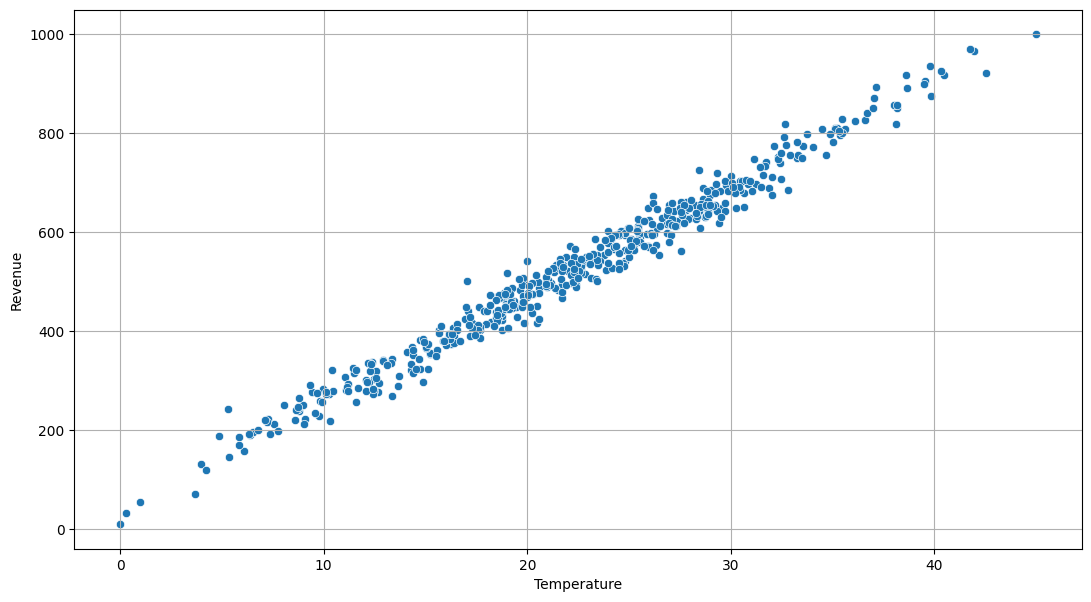

In [7]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='Temperature',y='Revenue',data=sales_df)
plt.grid()
plt.show()

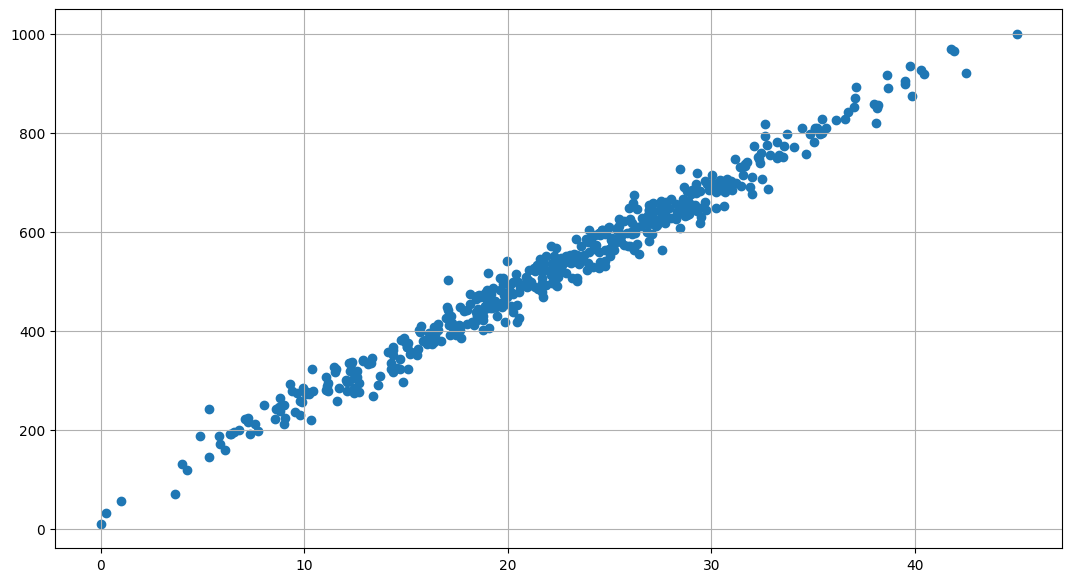

In [8]:
plt.figure(figsize=(13,7))
plt.scatter(sales_df['Temperature'],sales_df['Revenue'])
plt.grid()
plt.show()

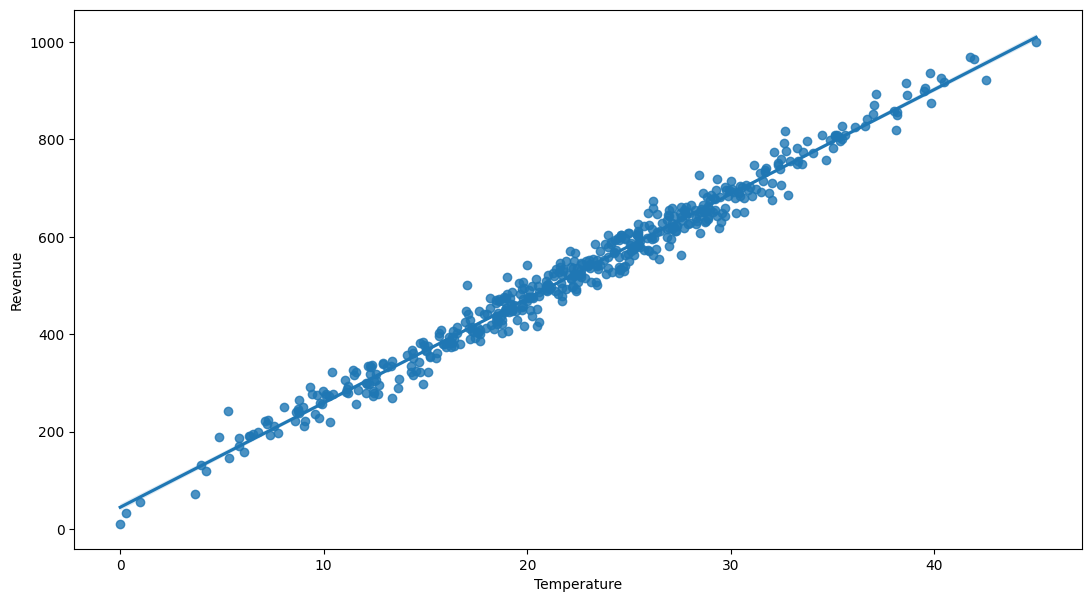

In [9]:
plt.figure(figsize=(13,7))
sns.regplot(x='Temperature',y='Revenue',data=sales_df)
plt.show()

In [10]:
X = sales_df['Temperature']
y = sales_df['Revenue']
print(X.shape, y.shape)

(500,) (500,)


In [11]:
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(500,) (500,)


In [12]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape, y.shape)

(500, 1) (500, 1)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [15]:
from sklearn.linear_model import LinearRegression

SimpleLinearRegression = LinearRegression(fit_intercept=True)
SimpleLinearRegression.fit(X_train,y_train)

LinearRegression()

$y = mX + c$ or $y = mX + b$

* m is coef
* c or b is intercept

In [16]:
f'Linear Model Coef: {SimpleLinearRegression.coef_}'

'Linear Model Coef: [[21.63208109]]'

In [17]:
f'Linear Model Intercept: {SimpleLinearRegression.intercept_}'

'Linear Model Intercept: [40.68521861]'

In [18]:
SimpleLinearRegression = LinearRegression(fit_intercept=False) # force best fit line to through the origin 
SimpleLinearRegression.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [19]:
f'Linear Model Coef: {SimpleLinearRegression.coef_}'

'Linear Model Coef: [[23.2553531]]'

In [20]:
f'Linear Model Intercept: {SimpleLinearRegression.intercept_}'

'Linear Model Intercept: 0.0'

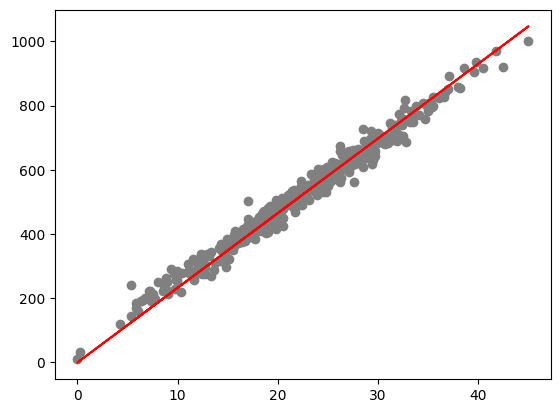

In [21]:
plt.scatter(X_train,y_train,color='gray')
plt.plot(X_train,SimpleLinearRegression.predict(X_train),color='red')
plt.show()

In [22]:
accuracy_LinearRegression = SimpleLinearRegression.score(X_test,y_test)
accuracy_LinearRegression

0.9642363854160401

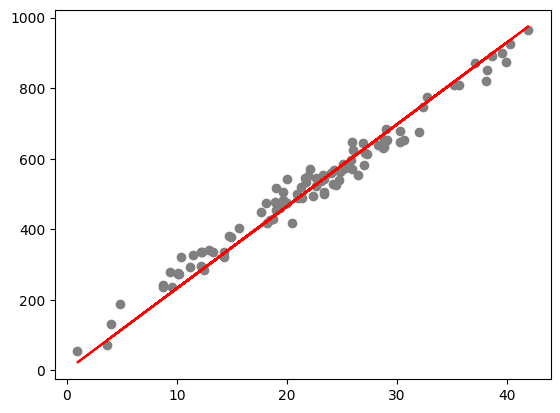

In [23]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,SimpleLinearRegression.predict(X_test),color='red')
plt.show()

In [24]:
Temp = np.array([20])
Temp = Temp.reshape(-1,1)

f'Revenue Predict for 20c is {SimpleLinearRegression.predict(Temp)}'

'Revenue Predict for 20c is [[465.10706208]]'

In [25]:
Temp = np.array([20,25,30])
Temp = Temp.reshape(-1,1)

f'Revenue Predict for 20c is {SimpleLinearRegression.predict(Temp)}'

'Revenue Predict for 20c is [[465.10706208]\n [581.3838276 ]\n [697.66059312]]'

$y = ax + b$

```
y = target 
x = single feature

a, b = slope, intercept 
```